<a href="https://colab.research.google.com/github/SubodhaB/Student360/blob/main/Student360%20behavior%20video%20framing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.makedirs("/content/raw_videos", exist_ok=True)
os.makedirs("/content/frames", exist_ok=True)

print("Folders created successfully!")


Folders created successfully!


In [ ]:
from google.colab import files
uploaded = files.upload()

# Move uploaded files to raw_videos folder
import shutil
for k in uploaded.keys():
    shutil.move(k, f"/content/raw_videos/{k}")

print("Videos uploaded to /content/raw_videos")


Saving Exam hall_copy.mp4 to Exam hall_copy.mp4
Videos uploaded to /content/raw_videos


In [ ]:
!pip install opencv-python-headless tqdm

In [ ]:
import cv2
import os
from tqdm import tqdm

video_path = "/content/raw_videos/Exam hall_copy.mp4"   # change name if needed
output_folder = "/content/frames"

os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print("Extracting frames...")
pbar = tqdm(range(total_frames))

count = 0
saved = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # SAVE 1 FRAME EVERY 15 FRAMES
    if count % 15 == 0:
        file_name = f"frame_{count}.jpg"
        cv2.imwrite(os.path.join(output_folder, file_name), frame)
        saved += 1

    count += 1
    pbar.update(1)

cap.release()

print(f"Extraction complete! Total frames saved: {saved}")
print(f"Frames saved in: {output_folder}")

Extracting frames...


100%|█████████▉| 973/974 [00:33<00:00, 38.56it/s]

Extraction complete! Total frames saved: 65
Frames saved in: /content/frames


In [ ]:
import os

print("Frames:", len(os.listdir("/content/frames")))
print(os.listdir("/content/frames")[:10])  # show first 10 frames


Frames: 65
['frame_450.jpg', 'frame_360.jpg', 'frame_480.jpg', 'frame_60.jpg', 'frame_945.jpg', 'frame_930.jpg', 'frame_405.jpg', 'frame_225.jpg', 'frame_375.jpg', 'frame_120.jpg']


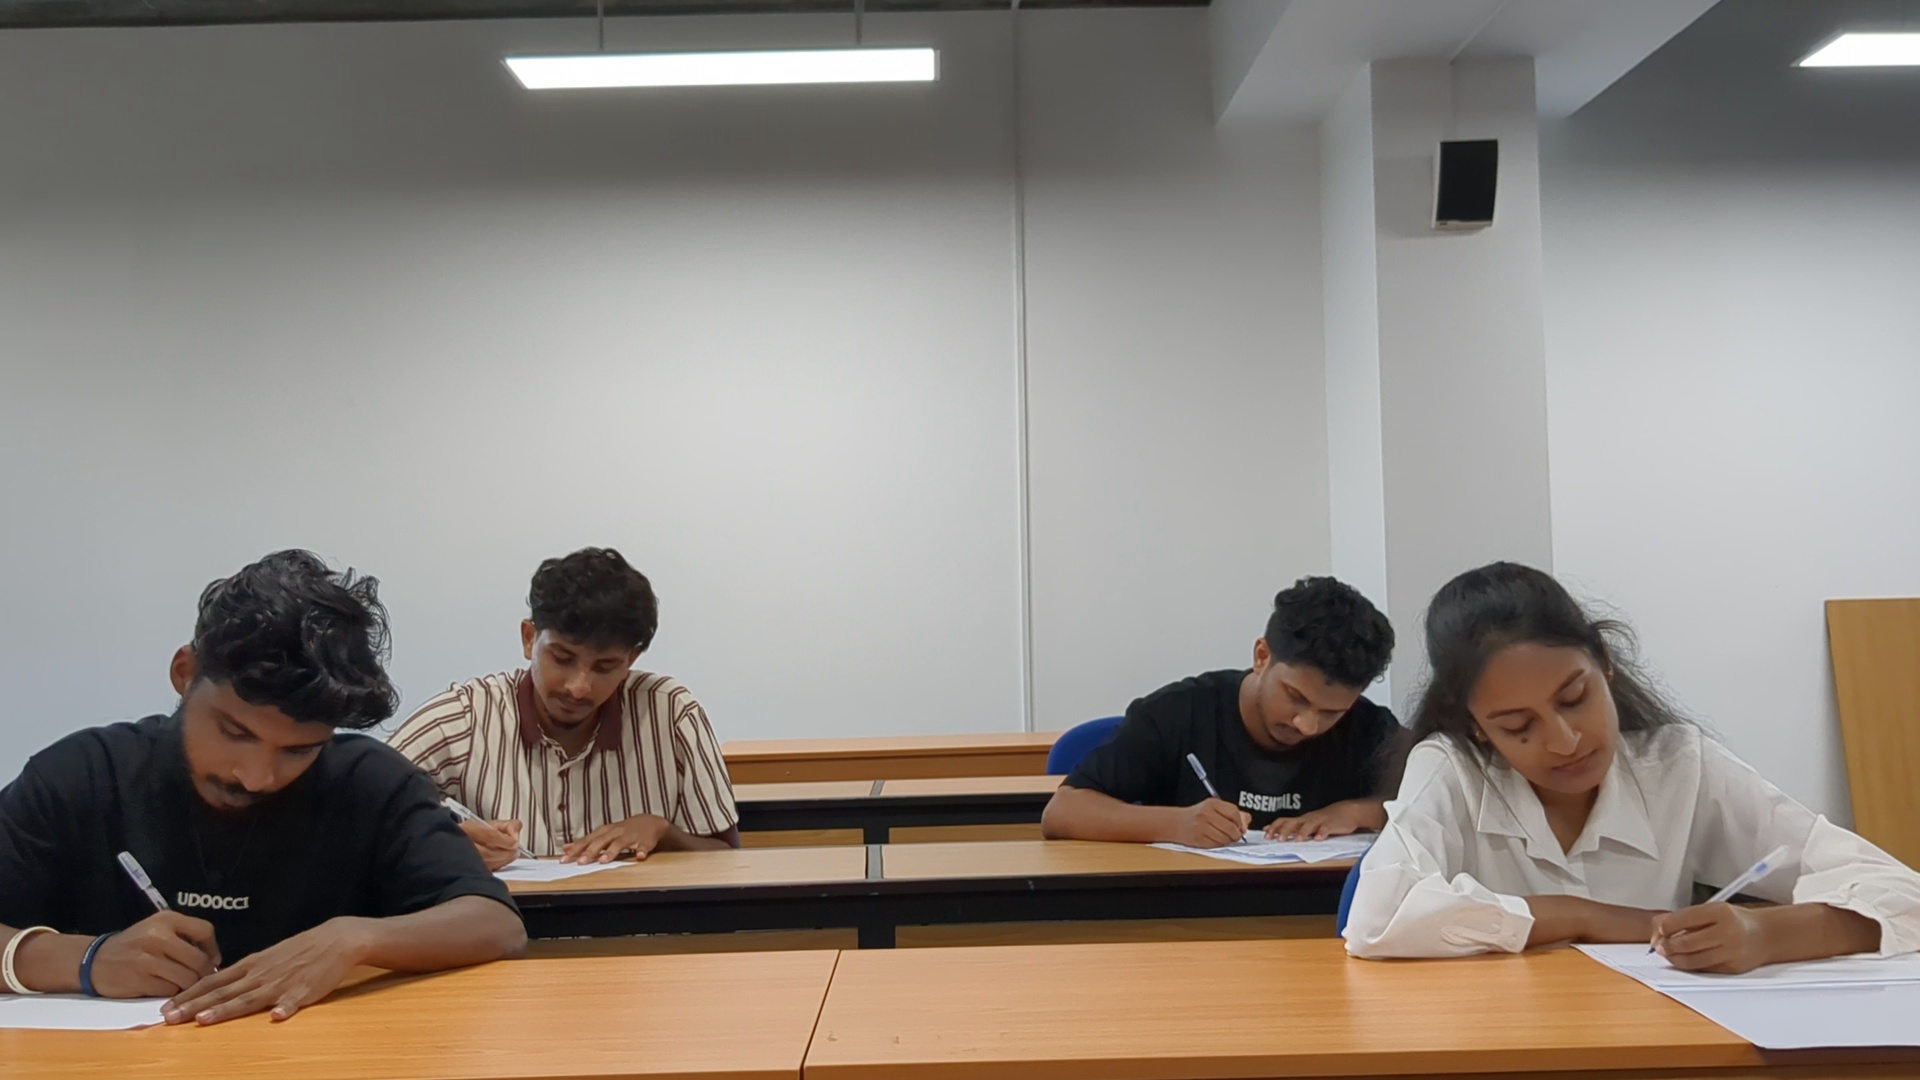

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/frames/frame_315.jpg")
cv2_imshow(img)


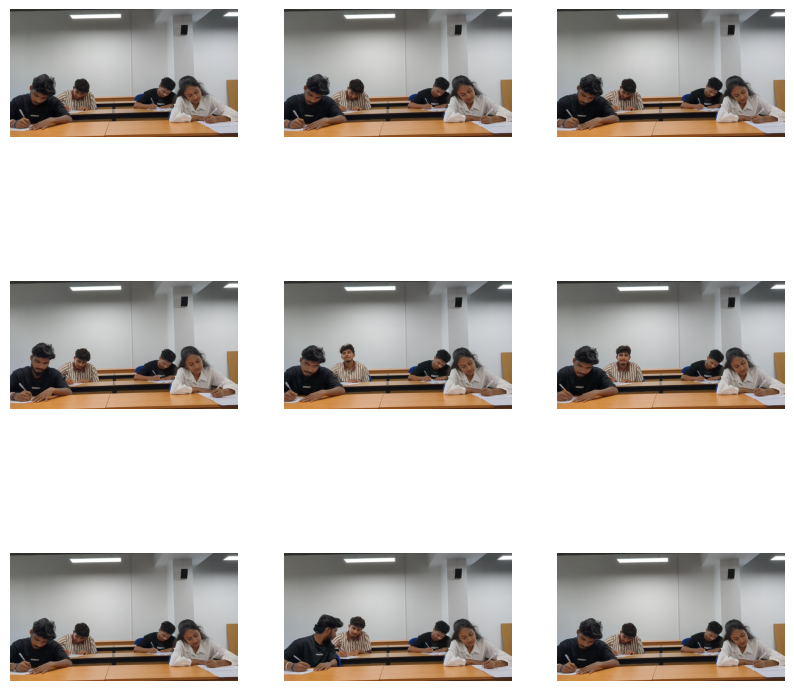

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

images = os.listdir("/content/frames")[:9]
plt.figure(figsize=(10,10))

for i, img_name in enumerate(images):
    img = cv2.imread(f"/content/frames/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


In [ ]:
import os
print("Total frames:", len(os.listdir("/content/frames")))

Total frames: 65


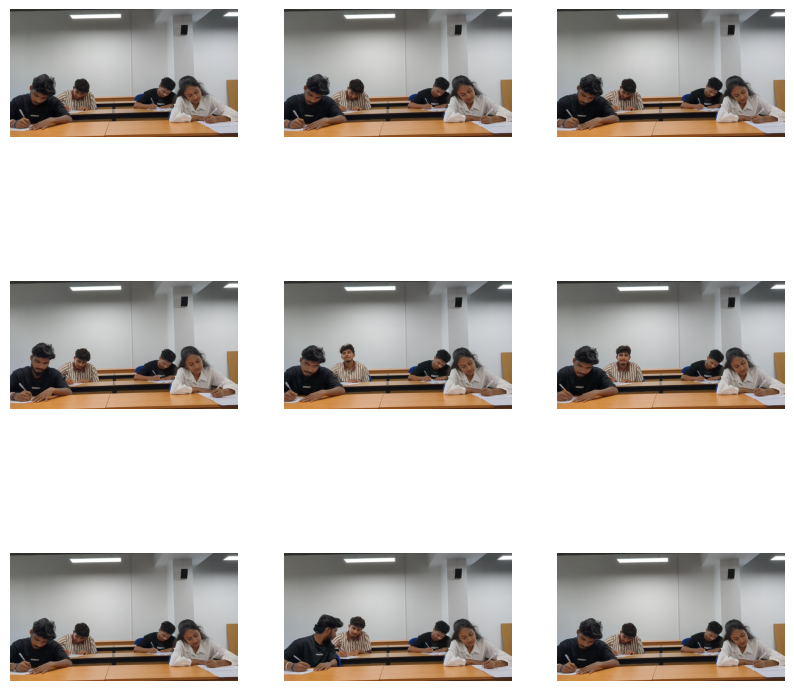

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

images = os.listdir("/content/frames")[:9]
plt.figure(figsize=(10,10))

for i, img_name in enumerate(images):
    img = cv2.imread(f"/content/frames/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [ ]:
!zip -r frames.zip /content/frames

  adding: content/frames/ (stored 0%)
  adding: content/frames/frame_450.jpg (deflated 0%)
  adding: content/frames/frame_360.jpg (deflated 0%)
  adding: content/frames/frame_480.jpg (deflated 0%)
  adding: content/frames/frame_60.jpg (deflated 0%)
  adding: content/frames/frame_945.jpg (deflated 1%)
  adding: content/frames/frame_930.jpg (deflated 1%)
  adding: content/frames/frame_405.jpg (deflated 0%)
  adding: content/frames/frame_225.jpg (deflated 0%)
  adding: content/frames/frame_375.jpg (deflated 0%)
  adding: content/frames/frame_120.jpg (deflated 0%)
  adding: content/frames/frame_885.jpg (deflated 1%)
  adding: content/frames/frame_135.jpg (deflated 0%)
  adding: content/frames/frame_435.jpg (deflated 0%)
  adding: content/frames/frame_615.jpg (deflated 0%)
  adding: content/frames/frame_705.jpg (deflated 0%)
  adding: content/frames/frame_420.jpg (deflated 0%)
  adding: content/frames/frame_75.jpg (deflated 0%)
  adding: content/frames/frame_270.jpg (deflated 0%)
  adding: 

In [ ]:
from google.colab import files
files.download("frames.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip Student\ Behavior\ Detection.v1i.yolov8.zip -d StudentDataset


Archive:  Student Behavior Detection.v1i.yolov8.zip
  inflating: StudentDataset/README.dataset.txt  
  inflating: StudentDataset/README.roboflow.txt  
  inflating: StudentDataset/data.yaml  
   creating: StudentDataset/train/
   creating: StudentDataset/train/images/
 extracting: StudentDataset/train/images/frame_120_jpg.rf.6346243baa32b5302fbf142fbf955287.jpg  
 extracting: StudentDataset/train/images/frame_135_jpg.rf.c23ca49475c77aaeaf4caab6d004939f.jpg  
 extracting: StudentDataset/train/images/frame_150_jpg.rf.45f514749302df3e70377d9039e99d44.jpg  
 extracting: StudentDataset/train/images/frame_165_jpg.rf.68fcb5e6f4b8efb462e24624ad2dd49d.jpg  
 extracting: StudentDataset/train/images/frame_180_jpg.rf.a40cea4678e49122e4bf2b559aff5d82.jpg  
 extracting: StudentDataset/train/images/frame_195_jpg.rf.9b334064a819c4512fee3fda23637cc2.jpg  
 extracting: StudentDataset/train/images/frame_210_jpg.rf.b9230482ecb14e0f0818ce1f9868dc3c.jpg  
 extracting: StudentDataset/train/images/frame_225_jp

In [ ]:
!ls StudentDataset

data.yaml  README.dataset.txt  README.roboflow.txt  train


In [ ]:
!mkdir -p valid/images
!mkdir -p valid/labels
!mkdir -p test/images
!mkdir -p test/labels

In [ ]:
import os, glob, shutil
import random

# folders
train_img_dir = "train/images"
train_lbl_dir = "train/labels"

valid_img_dir = "valid/images"
valid_lbl_dir = "valid/labels"

test_img_dir = "test/images"
test_lbl_dir = "test/labels"

# collect images
images = glob.glob(train_img_dir + "/*.jpg")
random.shuffle(images)

# split
n_images = len(images)
n_valid = max(1, int(n_images * 0.2))
n_test = max(1, int(n_images * 0.1))

valid_imgs = images[:n_valid]
test_imgs  = images[n_valid:n_valid+n_test]

def move_files(file_list, target_img_dir, target_lbl_dir):
    for img_path in file_list:
        base = os.path.basename(img_path)
        label = base.replace(".jpg", ".txt")

        # move image
        shutil.move(img_path, os.path.join(target_img_dir, base))

        # move label
        lbl_src = os.path.join(train_lbl_dir, label)
        if os.path.exists(lbl_src):
            shutil.move(lbl_src, os.path.join(target_lbl_dir, label))

move_files(valid_imgs, valid_img_dir, valid_lbl_dir)
move_files(test_imgs,  test_img_dir,  test_lbl_dir)

print("Valid images:", len(valid_imgs))
print("Test images:", len(test_imgs))


Valid images: 0
Test images: 0


In [ ]:
import yaml

file = "StudentDataset/data.yaml" # Changed this line
with open(file, "r") as f:
    data = yaml.safe_load(f)

data['train'] = "train/images"
data['val']   = "valid/images"
data['test']  = "test/images"

with open(file, "w") as f:
    yaml.dump(data, f)

print(data)

{'train': 'train/images', 'val': 'valid/images', 'test': 'test/images', 'nc': 1, 'names': ['copying'], 'roboflow': {'workspace': 'student360-dataset', 'project': 'student-behavior-detection-5bemq', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/student360-dataset/student-behavior-detection-5bemq/dataset/1'}}


In [ ]:
!ls
!ls train
!ls valid
!ls test

 frames         sample_data				     test
 frames.zip     Student-Behavior-Detection-1		     valid
 raw_videos    'Student Behavior Detection.v1i.yolov8.zip'
 roboflow.zip   StudentDataset
ls: cannot access 'train': No such file or directory
images	labels
images	labels


In [ ]:
!ls StudentDataset

data.yaml  README.dataset.txt  README.roboflow.txt  train


In [ ]:
!mkdir -p valid/images
!mkdir -p valid/labels
!mkdir -p test/images
!mkdir -p test/labels

In [ ]:
!ls StudentDataset

data.yaml  README.dataset.txt  README.roboflow.txt  train
